In [1]:
import graphlab
import numpy as np

In [2]:
sales = graphlab.SFrame("E:\\Machine Learning\\U.W\\Regression\\kc_house_data_small.gl/")

This non-commercial license of GraphLab Create for academic use is assigned to lxn1021@gmail.com and will expire on November 18, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Xiaoning\AppData\Local\Temp\graphlab_server_1545269185.log.0


In [3]:
sales.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3.0,1.0,1180.0,5650,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000,3.0,2.25,2570.0,7242,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000,2.0,1.0,770.0,10000,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000,4.0,3.0,1960.0,5000,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000,3.0,2.0,1680.0,8080,1.0,0
2008000270,2015-01-15 00:00:00+00:00,291850,3.0,1.5,1060.0,9711,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500,3.0,1.0,1780.0,7470,1.0,0
1736800520,2015-04-03 00:00:00+00:00,662500,3.0,2.5,3560.0,9796,1.0,0
9297300055,2015-01-24 00:00:00+00:00,650000,4.0,3.0,2950.0,5000,2.0,0
6865200140,2014-05-29 00:00:00+00:00,485000,4.0,1.0,1600.0,4300,1.5,0


In [4]:
def get_numpy_data(data_sframe, features, output):
    data_sframe["constant"] = 1
    features = ["constant"] + features
    features_sframe = data_sframe[features]
    
    feature_matrix = features_sframe.to_numpy()
    
    output_sarray = data_sframe[output]
    output_array = output_sarray.to_numpy()
    
    
    return (feature_matrix, output_array)

In [5]:
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix, axis = 0)
    normalized_features = feature_matrix / norms
        
    return (normalized_features, norms)

In [6]:
(train_and_validation, test) = sales.random_split(.8, seed=1)
(train, validation) = train_and_validation.random_split(.8, seed=1)

In [7]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']

features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

In [8]:
features_train, norms = normalize_features(features_train)
features_test = features_test / norms
features_valid = features_valid / norms

In [13]:
features_test[0]

array([ 0.01345102,  0.01551285,  0.01807473,  0.01759212,  0.00160518,
        0.017059  ,  0.        ,  0.05102365,  0.0116321 ,  0.01564352,
        0.01362084,  0.02481682,  0.01350306,  0.        ,  0.01345386,
       -0.01346927,  0.01375926,  0.0016225 ])

In [12]:
features_train[9]

array([ 0.01345102,  0.01163464,  0.00602491,  0.0083488 ,  0.00050756,
        0.01279425,  0.        ,  0.        ,  0.01938684,  0.01390535,
        0.0096309 ,  0.        ,  0.01302544,  0.        ,  0.01346821,
       -0.01346254,  0.01195898,  0.00156612])

1. Question 1
From the section "Compute a single distance": we take our query house to be the first house of the test set.

What is the Euclidean distance between the query house and the 10th house of the training set? Enter your answer in American-style decimals (e.g. 0.044) rounded to 3 decimal places.

In [14]:
np.sqrt(((features_test[0] - features_train[9]) ** 2).sum())

0.05972359371666126

In [18]:
nearest = np.zeros(10)

for i in range(10):
    nearest[i] = np.sqrt(((features_test[0] - features_train[i]) ** 2).sum())

2. Question 2
From the section "Compute multiple distances": we take our query house to be the first house of the test set.

Among the first 10 training houses, which house is the closest to the query house? Enter the 0-based index of the closest house.

In [22]:
nearest

array([0.06027471, 0.08546881, 0.06149946, 0.05340274, 0.05844484,
       0.05987922, 0.0546314 , 0.05543108, 0.05238363, 0.05972359])

In [23]:
min(nearest)

0.05238362784097273

In [27]:
for i in range(3):
    print features_train[i] - features_test[0]

[ 0.00000000e+00 -3.87821276e-03 -1.20498190e-02 -1.05552733e-02
  2.08673616e-04 -8.52950206e-03  0.00000000e+00 -5.10236549e-02
  0.00000000e+00 -3.47633726e-03 -5.50336860e-03 -2.48168183e-02
 -1.63756198e-04  0.00000000e+00 -1.70072004e-05  1.30577772e-05
 -5.14364795e-03  6.69281453e-04]
[ 0.00000000e+00 -3.87821276e-03 -4.51868214e-03 -2.26610387e-03
  7.19763456e-04  0.00000000e+00  0.00000000e+00 -5.10236549e-02
  0.00000000e+00 -3.47633726e-03  1.30705004e-03 -1.45830788e-02
 -1.91048898e-04  6.65082271e-02  4.23240653e-05  6.22415897e-06
 -2.89330197e-03  1.47606982e-03]
[ 0.00000000e+00 -7.75642553e-03 -1.20498190e-02 -1.30002801e-02
  1.60518166e-03 -8.52950206e-03  0.00000000e+00 -5.10236549e-02
  0.00000000e+00 -5.21450589e-03 -8.32384500e-03 -2.48168183e-02
 -3.13866046e-04  0.00000000e+00  4.71047219e-05  1.56530415e-05
  3.72914476e-03  1.64764925e-03]


In [28]:
print features_train[0:3] - features_test[0]

[[ 0.00000000e+00 -3.87821276e-03 -1.20498190e-02 -1.05552733e-02
   2.08673616e-04 -8.52950206e-03  0.00000000e+00 -5.10236549e-02
   0.00000000e+00 -3.47633726e-03 -5.50336860e-03 -2.48168183e-02
  -1.63756198e-04  0.00000000e+00 -1.70072004e-05  1.30577772e-05
  -5.14364795e-03  6.69281453e-04]
 [ 0.00000000e+00 -3.87821276e-03 -4.51868214e-03 -2.26610387e-03
   7.19763456e-04  0.00000000e+00  0.00000000e+00 -5.10236549e-02
   0.00000000e+00 -3.47633726e-03  1.30705004e-03 -1.45830788e-02
  -1.91048898e-04  6.65082271e-02  4.23240653e-05  6.22415897e-06
  -2.89330197e-03  1.47606982e-03]
 [ 0.00000000e+00 -7.75642553e-03 -1.20498190e-02 -1.30002801e-02
   1.60518166e-03 -8.52950206e-03  0.00000000e+00 -5.10236549e-02
   0.00000000e+00 -5.21450589e-03 -8.32384500e-03 -2.48168183e-02
  -3.13866046e-04  0.00000000e+00  4.71047219e-05  1.56530415e-05
   3.72914476e-03  1.64764925e-03]]


In [37]:
diff = features_train - features_test[0]

In [39]:
print diff[-1].sum()

-0.0934339605841801


In [41]:
print np.sum(diff**2, axis=1)[15]
print np.sum(diff[15]**2)

0.003307059028786791
0.0033070590287867904


In [42]:
distances = np.sqrt(np.sum(diff**2, axis = 1))

In [43]:
print distances[100]

0.023708232449603735


In [44]:
def distance(features_train, features_test):
    diff = features_train - features_test
    distances = np.sqrt(np.sum(diff**2, axis = 1))
    
    return distances

3. Question 3
From the section "Perform 1-nearest neighbor regression":

Take the query house to be third house of the test set (features_test[2]). What is the (0-based) index of the house in the training set that is closest to this query house?

In [50]:
distances = distance(features_train, features_test[2])

for i in range(len(distances)):
    if distances[i] == min(distances):
        print i
        break

382


4. Question 4
From the section "Perform 1-nearest neighbor regression":

Take the query house to be third house of the test set (features_test[2]). What is the predicted value of the query house based on 1-nearest neighbor regression? Enter your answer in simple decimals without comma separators (e.g. 300000), rounded to nearest whole number.

In [53]:
train[382]["price"]

249000L

In [64]:
def k_nearest(k, features_train, features_test):
    diff = features_train - features_test
    distances = np.sqrt(np.sum(diff**2, axis = 1))
    sort = np.argsort(distances)
    
    return sort[0:4]

5. Question 5
From the section "Perform k-nearest neighbor regression":

Take the query house to be third house of the test set (features_test[2]). Which of the following is NOT part of the 4 training houses closest to the query house? (Note that all indices are 0-based.)

In [65]:
k_nearest(4, features_train, features_test[2])

array([ 382, 1149, 4087, 3142], dtype=int64)

In [90]:
def k_nearest_avg(k, features_train, features_test, output):
    diff = features_train - features_test
    distances = np.sqrt(np.sum(diff ** 2, axis = 1))
    sorted_distances = np.argsort(distances)
    k_neighbors = sorted_distances[0:k]

    total = 0
    for i in range(len(k_neighbors)):
        total = total + train[k_neighbors[i]][output]
        
    predicted_output = total / k
        
        
    return predicted_output

6. Question 6
From the section "Perform k-nearest neighbor regression":

Take the query house to be third house of the test set (features_test[2]). Predict the value of the query house by the simple averaging method. Enter your answer in simple decimals without comma separators (e.g. 241242), rounded to nearest whole number.

In [91]:
k_nearest_avg(4, features_train, features_test[2], "price")

413987L

In [92]:
def k_nearest_predictions(k, features_train, output, features_test):
    predictions = np.zeros(len(features_test))
    
    for j in range(len(features_test)):
        predictions[j] = k_nearest_avg(k, features_train, features_test[j], output)
        
        
    return predictions

In [102]:
predictions_test = k_nearest_predictions(10, features_train, "price", features_test[0:10])

7. Question 7
From the section "Perform k-nearest neighbor regression": Make prediction for the first 10 houses using k-nearest neighbors with k=10.

What is the index of the house in this query set that has the lowest predicted value? Enter an index between 0 and 9.

In [103]:
for i in range(10):
    if predictions_test[i] == min(predictions_test):
        print i

6


In [113]:
rss_all = np.zeros(15)

for k in range(1, 16, 1):
    predictions_valid = k_nearest_predictions(k, features_train, "price", features_valid)
    rss_all[k-1] = ((predictions_valid - validation["price"]) ** 2).sum()

In [115]:
rss_all, min(rss_all)

(array([1.05453830e+14, 8.34450730e+13, 7.26921137e+13, 7.19467297e+13,
        6.98465160e+13, 6.88995574e+13, 6.83419862e+13, 6.73617000e+13,
        6.83727523e+13, 6.93350606e+13, 6.95238841e+13, 6.90499918e+13,
        7.00112724e+13, 7.09087253e+13, 7.11069565e+13]), 67361700020962.0)

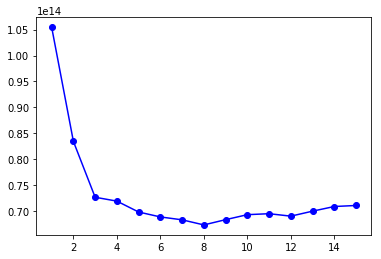

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

kvals = range(1, 16)
plt.plot(kvals, rss_all,'bo-')

8. Question 8
From the section "Perform k-nearest neighbor regression": We use a validation set to find the best k value, i.e. one that minimizes the RSS on validation set.

If we perform k-nearest neighbors with optimal k found above, what is the RSS on the TEST data? Choose the range that contains this value.

In [117]:
predictions_test = k_nearest_predictions(8, features_train, "price", features_test)
rss = ((predictions_test - test["price"]) ** 2).sum()

In [118]:
rss

133118842702196.0